In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import glob
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
!pip install shap

%matplotlib inline
# For Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.7 MB/s eta 0:00:00


In [ ]:
data=pd.read_csv('kidney_disease.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
data.classification=data.classification.replace("ckd\t","ckd")
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [ ]:
data.drop('id', axis = 1, inplace = True)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data['classification'] = data['classification'].replace(['ckd','notckd'], [1,0])
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


In [ ]:
df = data.dropna(axis = 0)
print(f"Before dropping all NaN values: {data.shape}")
print(f"After dropping all NaN values: {df.shape}")
df.head()

Before dropping all NaN values: (400, 25)
After dropping all NaN values: (158, 25)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    object 
 17  rc              158 non-null    obj

In [ ]:
df['pcv']=df['pcv'].astype(int)
df['wc']=df['wc'].astype(int)
df['rc']=df['rc'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    int64  
 16  wc              158 non-null    int64  
 17  rc              158 non-null    flo

In [ ]:
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [ ]:
df=df.replace(dictonary)

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
9,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29,12100,3.7,1,1,0,0,0,1,1
11,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32,4500,3.8,1,1,0,0,1,0,1
14,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16,11000,2.6,1,1,1,0,1,0,1
20,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24,9200,3.2,1,1,1,0,1,1,1


In [ ]:
countNoDisease = len(df[df['classification'] == 0])
countHaveDisease = len(df[df['classification'] == 1])
print("Percentage of Patients Haven't CKD Disease: {:.2f}%".format((countNoDisease / (len(df['classification']))*100)))
print("Percentage of Patients Have CKD Disease: {:.2f}%".format((countHaveDisease / (len(df['classification']))*100)))


Percentage of Patients Haven't CKD Disease: 72.78%
Percentage of Patients Have CKD Disease: 27.22%


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['classification', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'], axis = 1)
y = df['classification']

USING PCA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=18)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


SVM

Accuracy on (SVM): 0.7301587301587301

SVM Model Metrics:
Precision: 0.0
Accuracy: 0.71875
Recall: 0.0
F1-score: 0.0

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        23
           1       0.00      0.00      0.00         9

    accuracy                           0.72        32
   macro avg       0.36      0.50      0.42        32
weighted avg       0.52      0.72      0.60        32


Confusion Matrix:
[[23  0]
 [ 9  0]]


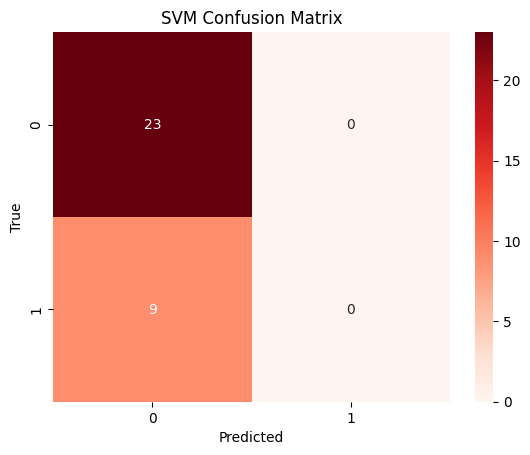

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
X = df.drop(['classification', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'], axis = 1)
Y = df['classification']

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(probability=True, kernel='linear', random_state=1)

svm_model.fit(X_train, Y_train)

Y_train_pred_svm = svm_model.predict(X_train_scaled)
accuracy_svm = accuracy_score(Y_train, Y_train_pred_svm)
print('Accuracy on (SVM):', accuracy_svm)

Y_test_pred_svm = svm_model.predict(X_test_scaled)

print('\nSVM Model Metrics:')
print('Precision:', precision_score(Y_test, Y_test_pred_svm))
print('Accuracy:', accuracy_score(Y_test, Y_test_pred_svm))
print('Recall:', recall_score(Y_test, Y_test_pred_svm))
print('F1-score:', f1_score(Y_test, Y_test_pred_svm))
print('\nClassification Report:')
print(classification_report(Y_test, Y_test_pred_svm))
print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, Y_test_pred_svm))

# Plot confusion matrix for SVM model
sns.heatmap(confusion_matrix(Y_test, Y_test_pred_svm), annot=True, cmap='Reds', fmt='g')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


KNN

Accuracy (KNN): 0.9603174603174603

KNN Model Metrics:
Precision: 1.0
Accuracy: 0.9375
Recall: 0.7777777777777778
F1-score: 0.8750000000000001

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.78      0.88         9

    accuracy                           0.94        32
   macro avg       0.96      0.89      0.92        32
weighted avg       0.94      0.94      0.93        32


Confusion Matrix:
[[23  0]
 [ 2  7]]


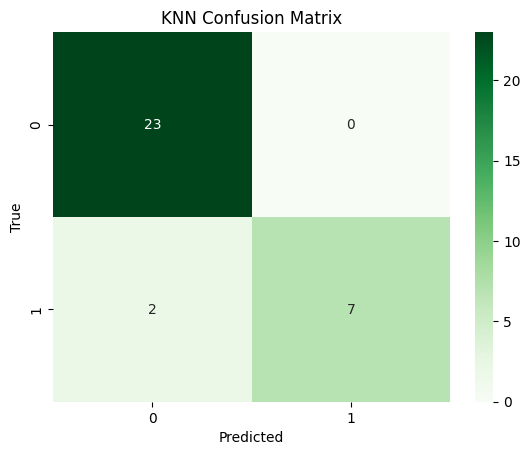

In [42]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_train_pred_knn = knn_model.predict(X_train_scaled)
accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
print('Accuracy (KNN):', accuracy_knn)

y_test_pred_knn = knn_model.predict(X_test_scaled)

# Print metrics for KNN model
print('\nKNN Model Metrics:')
print('Precision:', precision_score(y_test, y_test_pred_knn))
print('Accuracy:', accuracy_score(y_test, y_test_pred_knn))
print('Recall:', recall_score(y_test, y_test_pred_knn))
print('F1-score:', f1_score(y_test, y_test_pred_knn))
print('\nClassification Report:')
print(classification_report(y_test, y_test_pred_knn))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_knn))

# Plot confusion matrix for KNN model
sns.heatmap(confusion_matrix(y_test, y_test_pred_knn), annot=True, cmap='Greens', fmt='g')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

RANDOM FOREST

Accuracy (Random Forest): 0.9375
Accuracy (Random Forest): 0.9375

Random Forest Model Metrics:
Precision: 1.0
Accuracy: 0.9375
Recall: 0.7777777777777778
F1-score: 0.8750000000000001

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.78      0.88         9

    accuracy                           0.94        32
   macro avg       0.96      0.89      0.92        32
weighted avg       0.94      0.94      0.93        32


Confusion Matrix:
[[23  0]
 [ 2  7]]


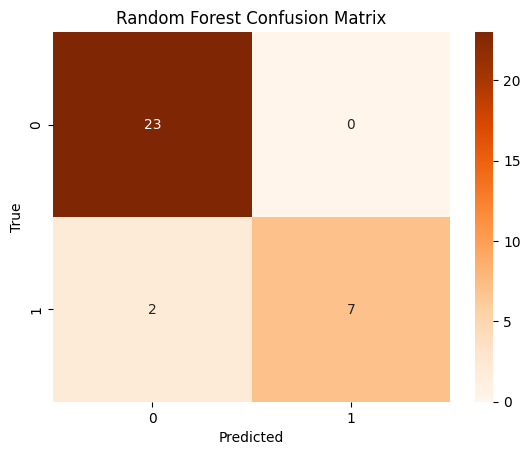

In [43]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(n_estimators=30, max_depth=1, random_state=1)
model.fit(X_train, y_train)

Y_test_pred_rf =model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, Y_test_pred_rf)
print('Accuracy (Random Forest):', accuracy_rf)
y_test_pred_rf = model.predict(X_test_scaled)

# Calculate accuracy for Random Forest model
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print('Accuracy (Random Forest):', accuracy_rf)

# Print metrics for Random Forest model
print('\nRandom Forest Model Metrics:')
print('Precision:', precision_score(y_test, y_test_pred_rf))
print('Accuracy:', accuracy_score(y_test, y_test_pred_rf))
print('Recall:', recall_score(y_test, y_test_pred_rf))
print('F1-score:', f1_score(y_test, y_test_pred_rf))
print('\nClassification Report:')
print(classification_report(y_test, y_test_pred_rf))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_rf))

# Plot confusion matrix for Random Forest model
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, cmap='Oranges', fmt='g')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


DecisionTreeClassifier

Accuracy (Decision Tree): 0.96875

Decision Tree Model Metrics:
Precision: 1.0
Accuracy: 0.96875
Recall: 0.8888888888888888
F1-score: 0.9411764705882353

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32


Confusion Matrix:
[[23  0]
 [ 1  8]]


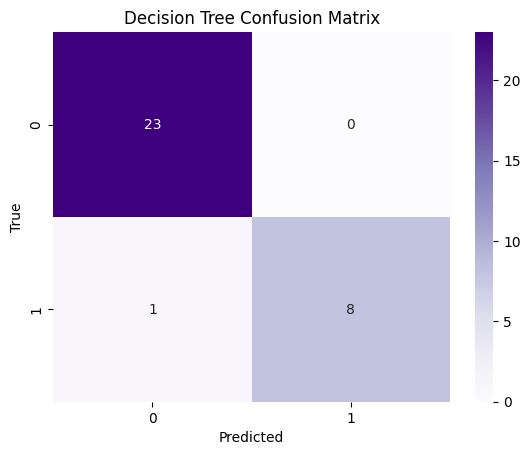

In [44]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
decision_tree_model = DecisionTreeClassifier(max_depth=1, random_state=1)
decision_tree_model.fit(X_train, y_train)

# Predict the labels for test set
y_test_pred_dt = decision_tree_model.predict(X_test_scaled)

# Calculate accuracy for test set
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print('Accuracy (Decision Tree):', accuracy_dt)

print('\nDecision Tree Model Metrics:')
print('Precision:', precision_score(y_test, y_test_pred_dt))
print('Accuracy:', accuracy_score(y_test, y_test_pred_dt))
print('Recall:', recall_score(y_test, y_test_pred_dt))
print('F1-score:', f1_score(y_test, y_test_pred_dt))
print('\nClassification Report:')
print(classification_report(y_test, y_test_pred_dt))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_dt))

# Plot confusion matrix for Decision Tree model
sns.heatmap(confusion_matrix(y_test, y_test_pred_dt), annot=True, cmap='Purples', fmt='g')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

GradientBoostingClassifier

Accuracy (Gradient Boosting): 0.8125

Gradient Boosting Model Metrics:
Precision: 1.0
Accuracy: 0.8125
Recall: 0.3333333333333333
F1-score: 0.5

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        23
           1       1.00      0.33      0.50         9

    accuracy                           0.81        32
   macro avg       0.90      0.67      0.69        32
weighted avg       0.85      0.81      0.78        32


Confusion Matrix:
[[23  0]
 [ 6  3]]


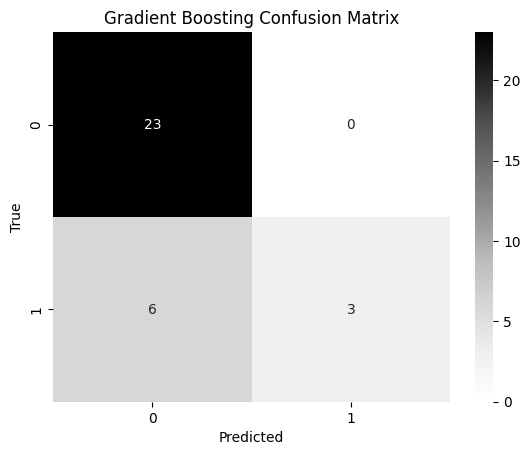

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
gradient_boost_model = GradientBoostingClassifier(n_estimators=50, max_depth=1, random_state=1)
gradient_boost_model.fit(X_train, y_train)

# Predict the labels for test set
y_test_pred_gradient_boost = gradient_boost_model.predict(X_test_scaled)

# Calculate accuracy for test set
accuracy_gradient_boost = accuracy_score(y_test, y_test_pred_gradient_boost)
print('Accuracy (Gradient Boosting):', accuracy_gradient_boost)

print('\nGradient Boosting Model Metrics:')
print('Precision:', precision_score(y_test, y_test_pred_gradient_boost))
print('Accuracy:', accuracy_score(y_test, y_test_pred_gradient_boost))
print('Recall:', recall_score(y_test, y_test_pred_gradient_boost))
print('F1-score:', f1_score(y_test, y_test_pred_gradient_boost))
print('\nClassification Report:')
print(classification_report(y_test, y_test_pred_gradient_boost))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_gradient_boost))

# Plot confusion matrix for Gradient Boosting model
sns.heatmap(confusion_matrix(y_test, y_test_pred_gradient_boost), annot=True, cmap='Greys', fmt='g')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AdaBoostClassifier

Accuracy (AdaBoost): 1.0

AdaBoost Model Metrics:
Precision: 1.0
Accuracy: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32


Confusion Matrix:
[[23  0]
 [ 0  9]]


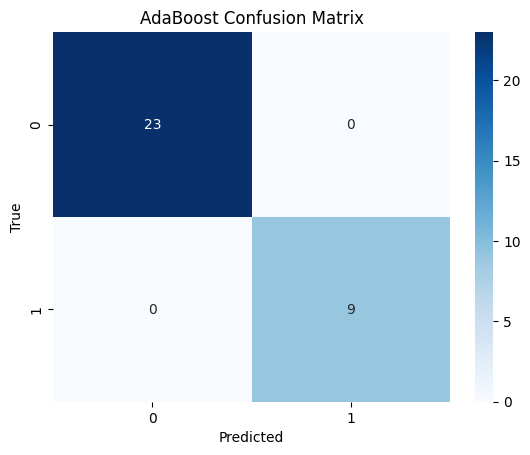

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
ada_boost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                     n_estimators=50, random_state=1)
ada_boost_model.fit(X_train, y_train)

# Predict the labels for test set
y_test_pred_ada_boost = ada_boost_model.predict(X_test_scaled)

# Calculate accuracy for test set
accuracy_ada_boost = accuracy_score(y_test, y_test_pred_ada_boost)
print('Accuracy (AdaBoost):', accuracy_ada_boost)

print('\nAdaBoost Model Metrics:')
print('Precision:', precision_score(y_test, y_test_pred_ada_boost))
print('Accuracy:', accuracy_score(y_test, y_test_pred_ada_boost))
print('Recall:', recall_score(y_test, y_test_pred_ada_boost))
print('F1-score:', f1_score(y_test, y_test_pred_ada_boost))
print('\nClassification Report:')
print(classification_report(y_test, y_test_pred_ada_boost))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_ada_boost))

# Plot confusion matrix for AdaBoost model
sns.heatmap(confusion_matrix(y_test, y_test_pred_ada_boost), annot=True, cmap='Blues', fmt='g')
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [48]:
import seaborn as sns

accuracy = {'RandomForest': accuracy_rf, 'SVM':accuracy_svm, 'KNN': accuracy_knn,'DecisionTree':accuracy_dt, 'GradientBoost': accuracy_gradient_boost ,'AdaBoost':accuracy_ada_boost}
sorted_accuracy = sorted(accuracy.items(), key=lambda x: x[1], reverse=True)
names = [model for model, _ in sorted_accuracy]
scores = [accuracy for _, accuracy in sorted_accuracy]
df = pd.DataFrame({'Model': names, 'Accuracy': scores})

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)

s

,Model,Accuracy
0,AdaBoost,1.000000
1,DecisionTree,0.968750
2,KNN,0.960317
3,RandomForest,0.937500
4,GradientBoost,0.812500
5,SVM,0.730159


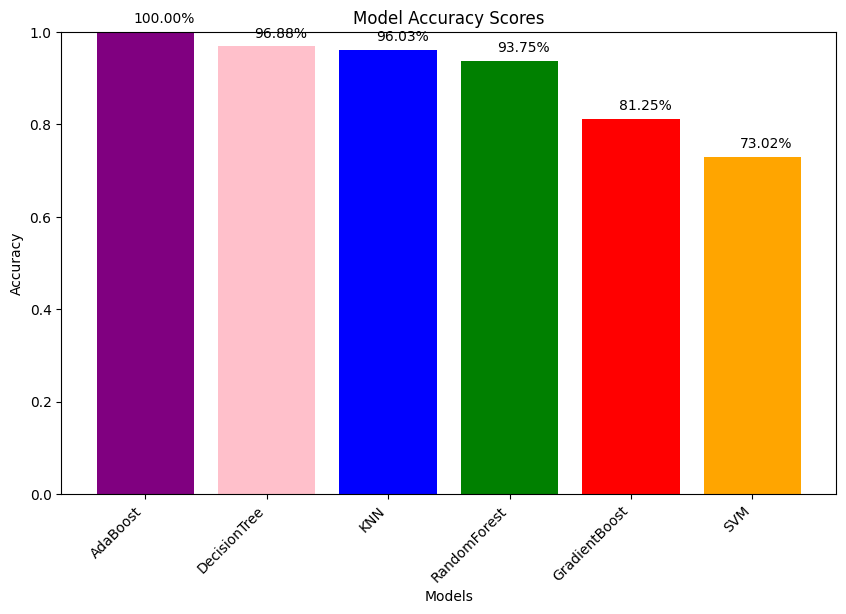

In [51]:
model_colors = {'RandomForest': 'green', 'SVM': 'orange',  'KNN': 'blue', 'DecisionTree': 'pink', 'GradientBoost': 'red','AdaBoost': 'purple',}

plt.figure(figsize=(10, 6))
bars = plt.bar(names, scores, color=[model_colors[model] for model in df['Model']])

for bar, accuracy in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{accuracy * 100:.2f}%', fontsize=10)

plt.title('Model Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

plt.show()